**Нейросеть по распознованию типа машины - Car, Bus, Truck**

In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output
from tensorflow.keras import backend as K
import numpy as np
from google.colab import drive
from tensorflow.keras.models import load_model

#drive.mount('/content/drive/')

class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.inter_dim = []
        self.val_inter_dim = []
        self.logits = []
        self.val_logits = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))        
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        clear_output(wait=True)
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss:" +
                 str(round(logs.get('loss'), 2)))
        ax1.plot(self.x, self.val_losses, label="v_loss:" +
                 str(round(logs.get('val_loss'), 2)))
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="acc:" +
                 str(round(logs.get('accuracy'), 2)))
        ax2.plot(self.x, self.val_acc, label="v_acc:" +
                 str(round(logs.get('val_accuracy'), 2)))
        ax2.legend()

        plt.savefig("fig")
        plt.show()
plot = PlotLearning()

In [ ]:
# загрузка архивов с тестовыми датасэтами
from google.colab import drive
import numpy as np
drive.mount('/content/drive/')
!cp /content/drive/My\ Drive/Colab\ Notebooks/CarsDetection/Data/$'1.zip' .
!cp /content/drive/My\ Drive/Colab\ Notebooks/CarsDetection/Data/$'2.zip' .
!cp /content/drive/My\ Drive/Colab\ Notebooks/CarsDetection/Data/$'3.zip' .

!unzip 1.zip
!unzip 2.zip
!unzip 3.zip

In [4]:
# извлечение изображений из файлов
import numpy as np
import math
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Colormap
from google.colab import files
import cv2
from matplotlib.colors import Colormap
import matplotlib.pyplot as plt
import os

num_classes = 3 
input_size = 50

def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #img = img.astype(float)/255
    width = img.shape[0]
    hight = img.shape[1]
    k = input_size/max(hight,width)
    img = cv2.resize(img, (round(hight*k), round(width*k)))
    k1 = round(abs(img.shape[0]-img.shape[1])/2)
    k2 = abs(img.shape[0]-img.shape[1])-k1
    if width>hight:
      img = np.pad(img, ((0,0),(k1,k2),(0,0)), 'constant', constant_values=(0, 0))
    else:
      img = np.pad(img, ((k1,k2),(0,0),(0,0)), 'constant', constant_values=(0, 0))
    return img

def download_files(CarClass):
  fc = os.listdir(str(CarClass+1))
  X = np.empty((len(fc), input_size, input_size, 3), dtype=np.uint8)
  y = np.empty((len(fc), 1), dtype=np.uint8)
  i = 0
  for filename in fc:
    path = os.path.join(os.getcwd(), str(CarClass+1), filename)
    X[i] = load_image(path)
    y[i] = int(CarClass)
    i+=1
  return X, y

car = 0
truck = 1
bus = 2

x1, y1 = download_files(car)
x2, y2 = download_files(truck)
x3, y3 = download_files(bus)

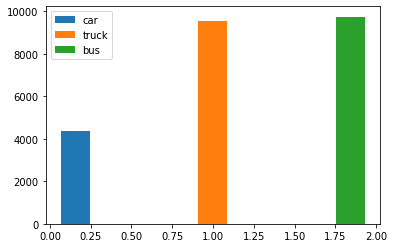

In [5]:
labels = ['car','truck','bus']
plt.hist((y1,y2,y3), num_classes, label=labels)
plt.legend()
plt.show()

Car


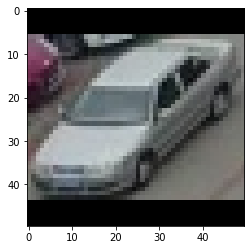

Track


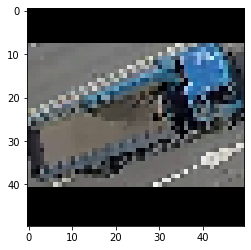

Bus


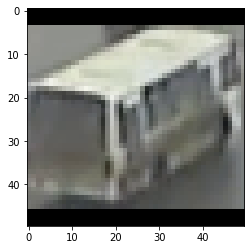

In [6]:
import random
print('Car')
plt.imshow(x1[random.randint(0, x1.shape[0])].astype(float)/255)
plt.show()
print('Track')
plt.imshow(x2[random.randint(0, x2.shape[0])].astype(float)/255)
plt.show()
print('Bus')
plt.imshow(x3[random.randint(0, x3.shape[0])].astype(float)/255)
plt.show()

In [7]:
# балансировка классов - дополнение классов до размера большего класса
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras

def BuildArr(x, y, n):
  nold = x.shape[0]
  num = n - nold
  while num > 0:
    if num >= nold:
      x = np.concatenate((x, x))
      y = np.concatenate((y, y))
    else:
      x = np.concatenate((x, x[:num,:,:,:]))
      y = np.concatenate((y, y[:num]))
    num -= nold
  return x, y

nmax = max(x1.shape[0], x2.shape[0], x3.shape[0])

x1, y1 = BuildArr(x1, y1, nmax)
x2, y2 = BuildArr(x2, y2, nmax)
x3, y3 = BuildArr(x3, y3, nmax)

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))


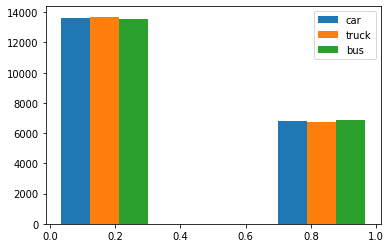

(20460, 3)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
labels = ['car','truck','bus']
plt.hist(y_train, num_classes, label=labels)
plt.legend()
plt.show()
print(y_train.shape)

Class  [0. 1. 0.]


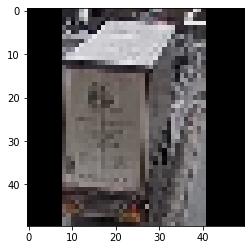

Class  [0. 1. 0.]


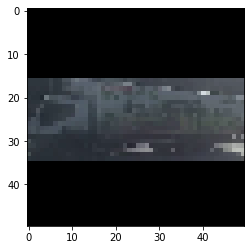

In [9]:
k = random.randint(0, x_train.shape[0])
print('Class ',y_train[k])
plt.imshow(x_train[k].astype(float)/255)
plt.show()

k = random.randint(0, x_test.shape[0])
print('Class ',y_test[k])
plt.imshow(x_test[k].astype(float)/255)
plt.show()

In [10]:
# аугментация изображений

import numpy as np
import os
import cv2
import copy
import imgaug as ia
from imgaug import augmenters as iaa
from tensorflow.keras.utils import Sequence
import xml.etree.ElementTree as ET
import time
import imutils

from imgaug.augmenters import Augmenter

class BatchGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, images, classes, batchSize=32):
        'Initialization'
        self.batchSize = batchSize
        self.images = images
        self.classes = classes
        self.on_epoch_end()

        self.counter = 0
        self.aug_pipe = iaa.Sequential(
            [
                iaa.SomeOf((1,1),
                [
                    iaa.Add((-30, -10)), # change brightness of images (by -10 to 10 of original value)
                    iaa.Multiply((0.8, 1.2))
                ]
                ),
            ],
            random_order=True
        )

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.images) / self.batchSize))

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.counter = 0

    def __getitem__(self, idx):
        # X : (n_samples, *dim, n_channels)
        'Generates data containing batchSize samples'
        # print("start")
        l_bound = idx*self.batchSize
        r_bound = (idx+1)*self.batchSize

        if r_bound > len(self.images):
            r_bound = r_bound-len(self.images)*(r_bound//len(self.images))
            l_bound = r_bound - self.batchSize

        x_batch = np.zeros(
            (r_bound - l_bound, input_size, input_size, 3))  # input images
        y_batch = np.zeros((r_bound - l_bound, num_classes))  # desired network output

        # Generate data
        instance_count = 0
        for i in range(l_bound, r_bound):
            img = self.aug_image(self.images[i])
            y_batch[instance_count] = self.classes[i]
            x_batch[instance_count] = img

            instance_count += 1

        self.counter += 1

        return x_batch, y_batch

    def aug_image(self, train_instance):
        image = train_instance
        #plt.imshow(image.astype(float)/255)
        #plt.show()
        flip = np.random.binomial(1, .5)
        if flip > 0.5:
            image = cv2.flip(image, 1)
            
        # раскомментировать для включения аугментаций
        image = self.aug_pipe.augment_image(image)
        #plt.imshow(image.astype(float)/255)
        #plt.show()
        return image.astype('float32')/255.

In [11]:
#архитектура нейронной сети

from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU, AveragePooling2D, PReLU


model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(32, (3, 3), strides=2))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(64, (3, 3), strides=2))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(AveragePooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer


In [12]:
# 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam 

filepath = '/content/drive/My Drive/Colab Notebooks/CarsDetection/model/model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

opt = Adam(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        1

In [13]:
# обучение модели

batch_size = 32
epochs = 100

train_batch = BatchGenerator(x_train, y_train, batchSize=batch_size)
valid_batch = BatchGenerator(x_test, y_test, batchSize=batch_size)
#4 - max_queue_size для чего указывается
model.fit_generator(generator=train_batch,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs, 
                    verbose=1,
                    validation_data=valid_batch,
                    validation_steps=len(x_test) // batch_size,
                    callbacks=[checkpoint],#, plot],
                    workers=4,
                    max_queue_size=32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
639/639 [==============================] - ETA: 0s - loss: 0.8502 - accuracy: 0.6256
Epoch 00001: val_accuracy improved from -inf to 0.67701, saving model to /content/drive/My Drive/Colab Notebooks/CarsDetection/model/model.h5
639/639 [==============================] - 142s 222ms/step - loss: 0.8502 - accuracy: 0.6256 - val_loss: 0.7401 - val_accuracy: 0.6770
Epoch 2/100
639/639 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.7236
Epoch 00002: val_accuracy did not improve from 0.67701
639/639 [==============================] - 140s 219ms/step - loss: 0.6551 - accuracy: 0.7236 - val_loss: 0.9350 - val_accuracy: 0.6229
Epoch 3/100
639/639 [==============================] - ETA: 0s - loss: 0.5948 - accuracy: 0.7531
Epoch 00003: val_accuracy improved from 0.67701 to 0.79881, saving model to /content/drive/My Drive/Colab Notebooks/CarsDetection/model/model.h5
639/639 [============

KeyboardInterrupt: ignored

          GT class           Predicted class


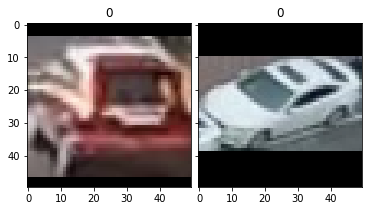

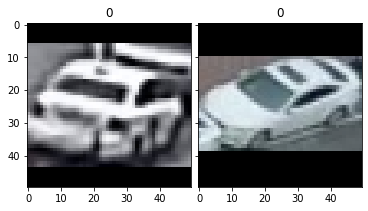

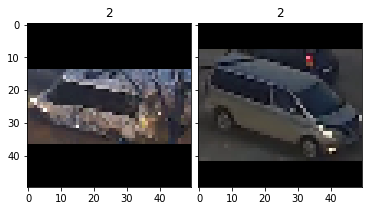

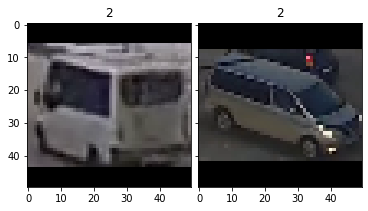

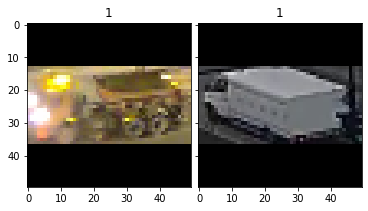

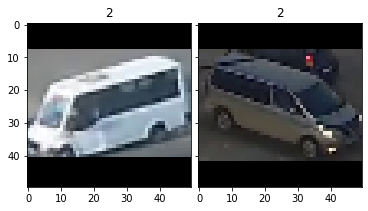

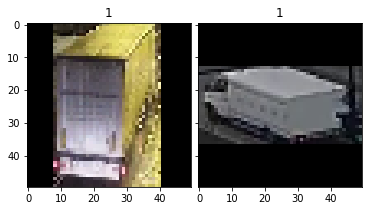

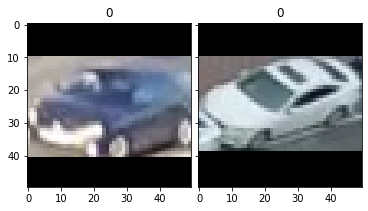

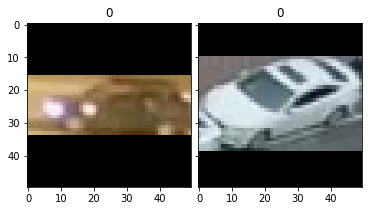

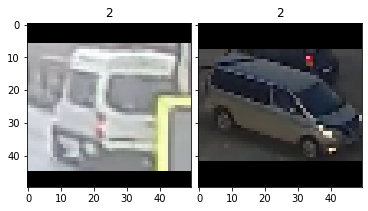

In [ ]:
# тестирование модели
from matplotlib.colors import Colormap
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random
from google.colab.patches import cv2_imshow

def get_class_sample(cls_index):
    for i in range(len(y_train)):        
        if np.argmax(y_train[i]) == cls_index:
            return x_train[i]
    return None

print("          GT class           Predicted class")
for i in range(10):    
    plt.set_cmap(Colormap("Greys"))
    fig = plt.figure(1, (4., 4.))
    grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 2), 
                 axes_pad=0.1,
                 )

    images = []
    np_images = []
    k = random.randint(0,len(x_test)-1)
    images.append(np.expand_dims(x_test[k], axis=0))
    np_images = np.vstack(images)
    #print(np_images.shape)
    #cv2_imshow(np_images[0])
    y = model.predict(np_images.astype('float32')/255.0)
    
    c = np.argmax(y[0])
    
    cls_name_pred = c
    cls_name_gt = np.argmax(y_test[k])
    
    img = x_test[k]
    img_pred = get_class_sample(cls_name_pred)
    grid[0].imshow(img)
    grid[0].set_title("{}".format(cls_name_gt))
    grid[1].imshow(img_pred)
    grid[1].set_title("{}".format(cls_name_pred))

    plt.show()